# Análise simples dos Tweets Coletados

In [2]:
import nltk
nltk.download('stopwords')


import pandas as pd
from nltk.corpus import stopwords
from nltk import FreqDist
from wordcloud import WordCloud
import matplotlib.pyplot as plt

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/franciscofoz/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# String: #Biblioteconomia

In [3]:
caminho = '/home/franciscofoz/Documents/GitHub/python-training/12 - Pacotes Python/tweepy/tweets_csv/tweets_#Biblioteconomia_20230529.csv'

tweets_biblioteconomia = pd.read_csv(caminho)
tweets_biblioteconomia

,username,username_name,date_brasilia,hora_brasilia,tweet_id,tweet_text,date_GMT,hora_GMT
0,@GUILLEMEMORIA,Luis Guillermo Venegas Bernal,2023-05-29,00:52:43,1663030585567084546,RT @pedroisandretta: Diretrizes da IFLA para p...,2023-05-29,03:52:43
1,@GeysiAnne,GeysiAnne Felipe,2023-05-28,22:21:04,1662992418893971456,RT @pedroisandretta: O futuro da Biblioteconom...,2023-05-29,01:21:04
2,@GeysiAnne,GeysiAnne Felipe,2023-05-28,22:16:49,1662991351661707274,RT @pedroisandretta: Diretrizes da IFLA para p...,2023-05-29,01:16:49
3,@MakoHubner,Marcos L F Hübner,2023-05-28,22:14:44,1662990825595326466,RT @pedroisandretta: Diretrizes da IFLA para p...,2023-05-29,01:14:44
4,@arq_csouza,Claudia Souza 🗂 📚 💻📊🎓🐈‍⬛🐈,2023-05-28,21:13:47,1662975488002863107,RT @pedroisandretta: Diretrizes da IFLA para p...,2023-05-29,00:13:47
5,@monnikitha_,bibliooque?,2023-05-28,20:45:59,1662968490624417796,RT @pedroisandretta: Diretrizes da IFLA para p...,2023-05-28,23:45:59
6,@lahmxlo_,Lah na biblio ×͜×,2023-05-28,20:22:04,1662962473605931009,RT @pedroisandretta: O futuro da Biblioteconom...,2023-05-28,23:22:04
7,@BoasPraticasBCI,Observatório de Boas Práticas,2023-05-28,20:14:23,1662960539302084608,Uma boa biblioteca é aquela que atende a sua c...,2023-05-28,23:14:23
8,@pedroisandretta,Pedro Andretta,2023-05-28,18:59:02,1662941577533181955,Diretrizes da IFLA para programas de formação ...,2023-05-28,21:59:02
9,@pedroisandretta,Pedro Andretta,2023-05-28,18:51:20,1662939637390639104,O futuro da Biblioteconomia: cinco tons de inq...,2023-05-28,21:51:20


In [10]:
tweets_biblioteconomia.username.value_counts().head(10)

username
@BoasPraticasBCI    4
@arq_csouza         2
@pedroisandretta    2
@SIBI_UFRJ          2
@GeysiAnne          2
@ETD_estudio        2
@GUILLEMEMORIA      1
@diegoleonardopa    1
@BibliOpos          1
@bforadacaixa       1
Name: count, dtype: int64

In [5]:
tweets_biblioteconomia.date_brasilia.value_counts()

date_brasilia
2023-05-28    12
2023-05-23     5
2023-05-24     4
2023-05-26     3
2023-05-27     2
2023-05-25     2
2023-05-29     1
Name: count, dtype: int64

In [6]:
tweets_biblioteconomia.tweet_text = tweets_biblioteconomia.tweet_text.str.lower()
palavras_tweets = []
for tweet in tweets_biblioteconomia['tweet_text']:
    palavras_tweets.extend(tweet.split())

palavras_tweets

['rt',
 '@pedroisandretta:',
 'diretrizes',
 'da',
 'ifla',
 'para',
 'programas',
 'de',
 'formação',
 'profissional',
 'em',
 'biblioteconomia',
 'e',
 'ciência',
 'da',
 'informação',
 '(2022)l',
 'para',
 'o…',
 'rt',
 '@pedroisandretta:',
 'o',
 'futuro',
 'da',
 'biblioteconomia:',
 'cinco',
 'tons',
 'de',
 'inquietação,',
 'organizado',
 'por',
 'moreno',
 'barros',
 '(2016)',
 'l',
 'ebook',
 'da',
 'briquet',
 'de',
 'lemo…',
 'rt',
 '@pedroisandretta:',
 'diretrizes',
 'da',
 'ifla',
 'para',
 'programas',
 'de',
 'formação',
 'profissional',
 'em',
 'biblioteconomia',
 'e',
 'ciência',
 'da',
 'informação',
 '(2022)l',
 'para',
 'o…',
 'rt',
 '@pedroisandretta:',
 'diretrizes',
 'da',
 'ifla',
 'para',
 'programas',
 'de',
 'formação',
 'profissional',
 'em',
 'biblioteconomia',
 'e',
 'ciência',
 'da',
 'informação',
 '(2022)l',
 'para',
 'o…',
 'rt',
 '@pedroisandretta:',
 'diretrizes',
 'da',
 'ifla',
 'para',
 'programas',
 'de',
 'formação',
 'profissional',
 'em',
 'b

In [11]:
stop_words = stopwords.words('portuguese')
termos_excluidos = ['#biblioteconomia','biblioteconomia']

stop_words.extend(termos_excluidos)

palavras_tweets_sem_stopwords = []

for palavra in palavras_tweets:
    if palavra not in stop_words:
        palavras_tweets_sem_stopwords.append(palavra)

In [12]:
frequencia_palavras = FreqDist(palavras_tweets_sem_stopwords)
sorted(dict(frequencia_palavras).items(), key=lambda x: x[1], reverse=True)

[('rt', 13),
 ('informação', 8),
 ('@pedroisandretta:', 7),
 ('biblioteconomia', 7),
 ('diretrizes', 6),
 ('ifla', 6),
 ('programas', 6),
 ('formação', 6),
 ('profissional', 6),
 ('ciência', 6),
 ('(2022)l', 6),
 ('site', 6),
 ('o…', 5),
 ('visite', 4),
 ('saber', 4),
 ('mais:', 4),
 ('🔗https://t.co/odmqbmeiqf', 4),
 ('#boaspraticasbci', 4),
 ('#projetodeextensaoufrn', 4),
 ('#librarianship', 4),
 ('-', 4),
 ('en', 4),
 ('futuro', 3),
 ('biblioteconomia:', 3),
 ('cinco', 3),
 ('tons', 3),
 ('inquietação,', 3),
 ('organizado', 3),
 ('moreno', 3),
 ('barros', 3),
 ('(2016)', 3),
 ('l', 3),
 ('ebook', 3),
 ('briquet', 3),
 ('biblioteca', 3),
 ('#bibliotecas', 3),
 ('1', 3),
 ('plaza', 3),
 ('técnico', 3),
 ('auxiliar', 3),
 ('ayuntamiento', 3),
 ('alella', 3),
 ('#biblioteconomía', 3),
 ('@etd_estudio:', 3),
 ('máster', 3),
 ('lemo…', 2),
 ('biblioteconomía', 2),
 ('del', 2),
 ('(#barcelona)', 2),
 ('https://t.co/edbfpaoulx', 2),
 ('#alella', 2),
 ('washington', 2),
 ('catálogo', 2),
 ('#

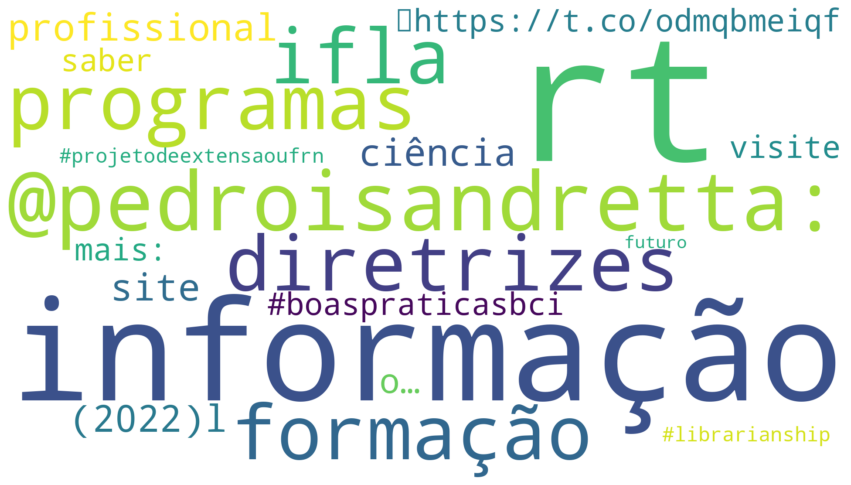

In [9]:
# Criar a nuvem de palavras
wordcloud = WordCloud(stopwords=stop_words,
                      background_color="white",
                      width=1920,
                      height=1080,
                      max_words=20,
                      prefer_horizontal=1).generate_from_frequencies(frequencia_palavras)
frequencia_palavras

# Plotar a nuvem de palavras
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()
